<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Fast Food Chains and Price Discrimination

_Authors: Kiefer Katovich (SF), Mario Carrillo (SF)_

---

This group lab uses a 1994 data set of detailed prices on items sold at more than 400 Burger King, Wendy's, KFC, and [Roy Rogers](https://en.wikipedia.org/wiki/Roy_Rogers_Restaurants) restaurants in New Jersey and Pennsylvania.

The data set is a restricted version of the data set used in this publication:

> [K. Graddy (1997), "Do Fast-Food Chains Price Discriminate on the Race and Income Characteristics of an Area?" Journal of Business and Economic Statistics 15, 391-401](http://people.brandeis.edu/~kgraddy/published%20papers/GraddyK_jbes1997.pdf).

**The goal of this exercise is to evaluate whether or not fast food restaurants are using discriminatory pricing.** This is a fairly open-ended prompt. It's up to you to determine how to quantify pricing discrimination using the following groups of variables:
- The price of fast food items, which can be a metric of discriminatory practices.
- The proportion of African Americans residents, low-income residents, and residents without a car.

---

### In Groups, You Should:

1) **Load and examine the data.**

2) **Perform any necessary data cleaning.**

3) **Conduct an exploratory data analysis relevant to the goals of the project.** What variables are you interested in for your target(s) and predictors? What types of relationships do you see in the data that will inform your analysis?

4) **Formulate and formally define your hypotheses.** Based on the prompt and your EDA, come up with a plan for testing each one.

5) **Construct regression models to test each hypothesis.** What are your findings? Do they support the hypothesis? What are the limitations and assumptions of your approach? 

6) **[Bonus] Cross-validate the results of your regression.** If the results support your hypotheses, do they hold up during cross-validation or a train/test split?

7) **Prepare a brief (10-minute) presentation on the findings.** Each group's presentation should include your questions, models, and findings.
    - Be concise! Only include relevant information in your presentation.
    - Visuals are nice, but don't overdo it.
    - Don't just talk about your model's significance or metrics. Interpret the coefficients. What are the implications?
    - What future hypotheses could you test going forward?


> *Note*: If you are interested, the full data set is also available in the "datasets" folder under the name `discrim_full.csv`.

### Data Set Characteristics

    :Number of Instances: 410
    
    :Attribute Information
    
    psoda         price of medium soda
    pfries        price of small fries
    pentree       price entree (burger or chicken)
    wagest        starting wage
    nmgrs         number of managers
    nregs         number of registers
    hrsopen       hours open
    emp           number of employees
    compown       =1 if company owned
    chain         BK = 1, KFC = 2, Roy Rogers = 3, Wendy's = 4
    density       population density, town
    crmrte        crime rate, town
    state         NJ = 1, PA = 2
    prpblck       proportion black, zipcode
    prppov        proportion in poverty, zipcode
    prpncar       proportion no car, zipcode
    hseval        median housing value, zipcode
    nstores       number of stores, zipcode
    income        median family income, zipcode
    county        county label
    NJ            =1 for New Jersey
    BK            =1 if Burger King
    KFC           =1 if Kentucky Fried Chicken
    RR            =1 if Roy Rogers

In [1]:
# Data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# Plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/regressions packages
from sklearn import linear_model
from sklearn.metrics import r2_score

# Make sure your charts appear in the notebook
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
food = pd.read_csv('./datasets/discrim.csv')

In [3]:
food.head()

,psoda,pfries,pentree,wagest,nmgrs,nregs,hrsopen,emp,compown,chain,...,prpncar,hseval,nstores,income,county,NJ,BK,KFC,RR,ID
0,1.12,1.06,1.02,4.25,3.0,5.0,16.0,27.5,1,3,...,0.078843,148300.0,3,44534.0,18,1,0,0,1,1
1,1.06,0.91,0.95,4.75,3.0,3.0,16.5,21.5,0,1,...,0.078843,148300.0,3,44534.0,18,1,1,0,0,2
2,1.06,0.91,0.98,4.25,3.0,5.0,18.0,30.0,0,1,...,0.269430,169200.0,3,41164.0,12,1,1,0,0,3
3,1.12,1.02,1.06,5.00,4.0,5.0,16.0,27.5,0,3,...,0.136690,171600.0,3,50366.0,10,1,0,0,1,4
4,1.12,NaN,0.49,5.00,3.0,3.0,16.0,5.0,0,1,...,0.073802,249100.0,1,72287.0,10,1,1,0,0,5


In [4]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 25 columns):
psoda      402 non-null float64
pfries     393 non-null float64
pentree    398 non-null float64
wagest     390 non-null float64
nmgrs      404 non-null float64
nregs      388 non-null float64
hrsopen    410 non-null float64
emp        404 non-null float64
compown    410 non-null int64
chain      410 non-null int64
density    409 non-null float64
crmrte     409 non-null float64
state      410 non-null int64
prpblck    409 non-null float64
prppov     409 non-null float64
prpncar    409 non-null float64
hseval     409 non-null float64
nstores    410 non-null int64
income     409 non-null float64
county     410 non-null int64
NJ         410 non-null int64
BK         410 non-null int64
KFC        410 non-null int64
RR         410 non-null int64
ID         410 non-null int64
dtypes: float64(15), int64(10)
memory usage: 80.1 KB


In [5]:
food.describe()

,psoda,pfries,pentree,wagest,nmgrs,nregs,hrsopen,emp,compown,chain,...,prpncar,hseval,nstores,income,county,NJ,BK,KFC,RR,ID
count,402.000000,393.000000,398.000000,390.000000,404.000000,388.000000,410.000000,404.000000,410.000000,410.000000,...,409.000000,409.000000,410.000000,409.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
mean,1.044876,0.921985,1.322186,4.615641,3.420297,3.608247,14.439024,17.621906,0.343902,2.117073,...,0.114874,147399.266504,3.139024,47053.784841,13.658537,0.807317,0.417073,0.195122,0.241463,205.500000
std,0.088687,0.105881,0.643085,0.347015,1.018408,1.243540,2.809987,9.423264,0.475589,1.110497,...,0.117416,56070.467520,1.809426,13179.286069,8.045439,0.394888,0.493678,0.396779,0.428493,118.501055
min,0.730000,0.670000,0.490000,4.250000,1.000000,1.000000,7.000000,3.000000,0.000000,1.000000,...,0.000000,33900.000000,1.000000,15919.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.980000,0.850000,0.950000,4.250000,3.000000,3.000000,12.000000,11.375000,0.000000,1.000000,...,0.043531,107900.000000,2.000000,37883.000000,6.000000,1.000000,0.000000,0.000000,0.000000,103.250000
50%,1.060000,0.930000,1.020000,4.500000,3.000000,3.000000,15.500000,16.375000,0.000000,2.000000,...,0.073892,142300.000000,3.000000,46272.000000,14.000000,1.000000,0.000000,0.000000,0.000000,205.500000
75%,1.085000,1.000000,1.470000,4.950000,4.000000,4.000000,16.000000,21.000000,1.000000,3.000000,...,0.123482,176800.000000,4.000000,54981.000000,20.000000,1.000000,1.000000,0.000000,0.000000,307.750000
max,1.490000,1.270000,3.950000,5.750000,10.000000,8.000000,24.000000,80.000000,1.000000,4.000000,...,0.627238,473400.000000,8.000000,136529.000000,29.000000,1.000000,1.000000,1.000000,1.000000,410.000000


In [6]:
df = food.dropna()
print len(df), 'rows left'

338 rows left


In [7]:
df['meal'] = df['psoda'] + df['pfries'] + df['pentree']

C:\Users\Samson\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
df.head()

,psoda,pfries,pentree,wagest,nmgrs,nregs,hrsopen,emp,compown,chain,...,hseval,nstores,income,county,NJ,BK,KFC,RR,ID,meal
0,1.12,1.06,1.02,4.25,3.0,5.0,16.0,27.5,1,3,...,148300.0,3,44534.0,18,1,0,0,1,1,3.20
1,1.06,0.91,0.95,4.75,3.0,3.0,16.5,21.5,0,1,...,148300.0,3,44534.0,18,1,1,0,0,2,2.92
2,1.06,0.91,0.98,4.25,3.0,5.0,18.0,30.0,0,1,...,169200.0,3,41164.0,12,1,1,0,0,3,2.95
3,1.12,1.02,1.06,5.00,4.0,5.0,16.0,27.5,0,3,...,171600.0,3,50366.0,10,1,0,0,1,4,3.20
5,1.06,0.95,1.01,4.25,4.0,4.0,15.0,17.5,0,1,...,148000.0,2,44515.0,18,1,1,0,0,6,3.02


In [9]:
df2 = df.drop(['psoda', 'pfries', 'pentree', 'chain'], axis=1)

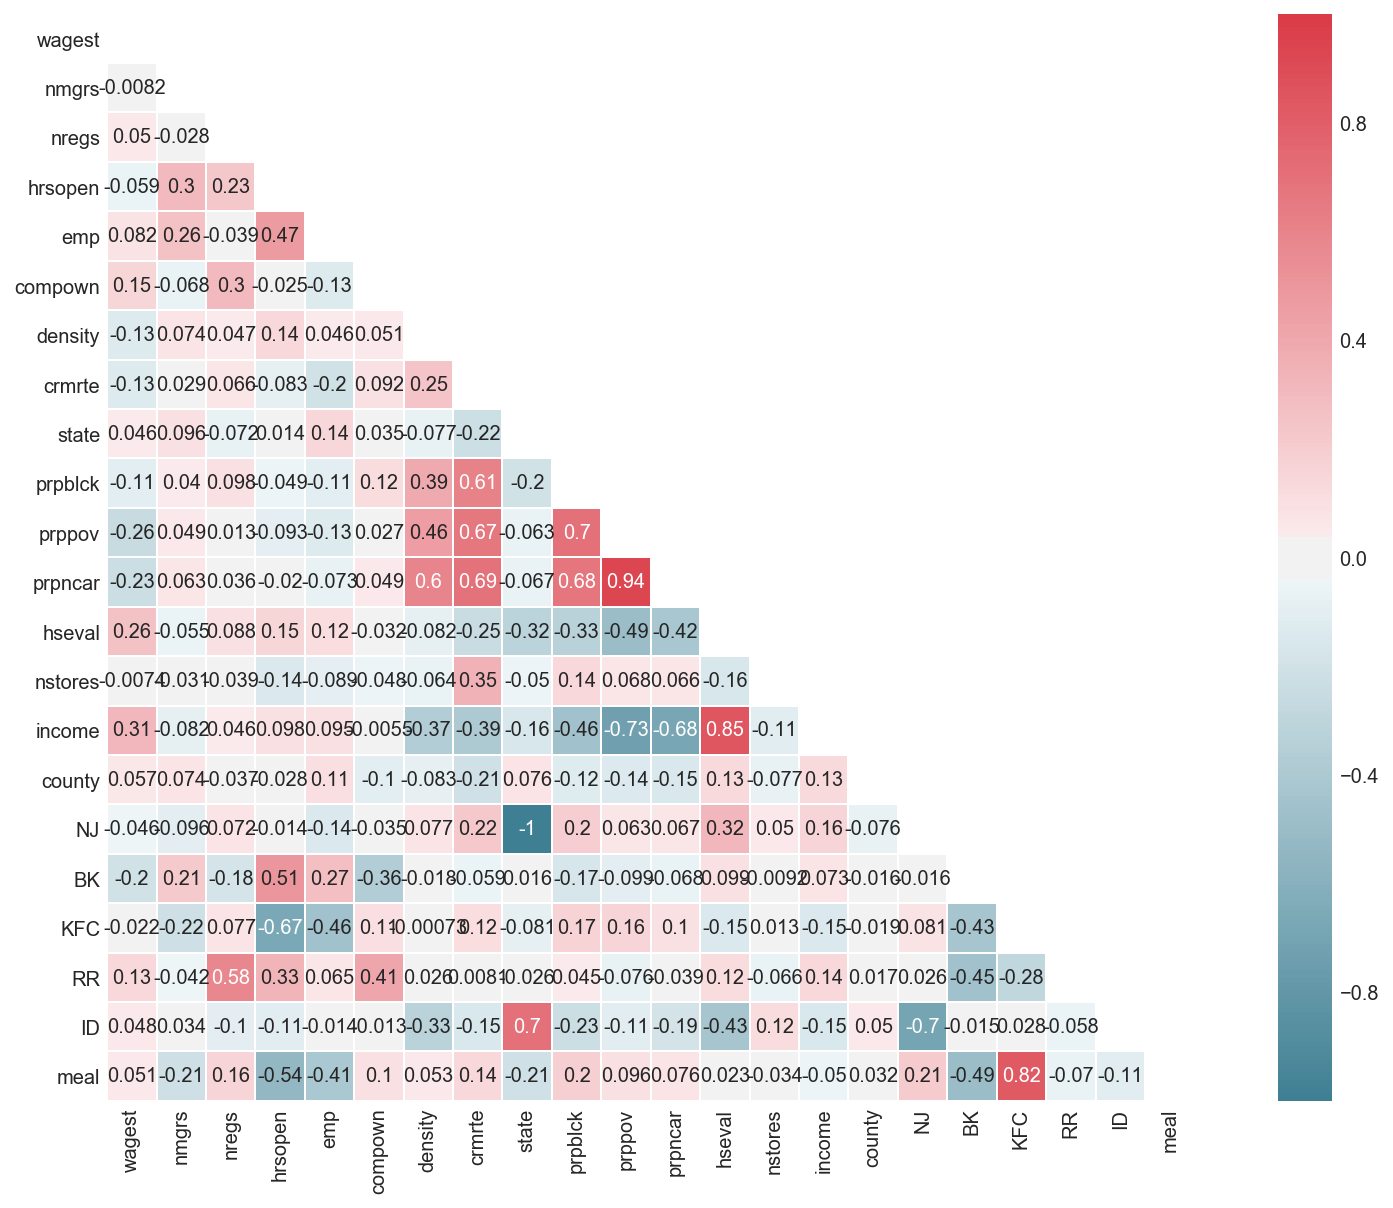

In [10]:
# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, annot=True)

In [11]:
#KFC has highest prices
df.groupby('chain').mean()[['psoda','pfries','pentree']]

,psoda,pfries,pentree
chain,,,
1,1.053525,0.918058,0.942950
2,1.014583,0.872083,2.474722
3,1.106753,1.004935,1.110390
4,0.963200,0.870200,1.180800


In [12]:
#New Jersey has higher prices
df.groupby('state').mean()[['psoda','pfries','pentree']]

,psoda,pfries,pentree
state,,,
1,1.062926,0.941815,1.371741
2,0.968824,0.838235,1.226765


In [13]:
#New Jersey has higher prices
df.groupby('state').mean()[['psoda','pfries','pentree']]

,psoda,pfries,pentree
state,,,
1,1.062926,0.941815,1.371741
2,0.968824,0.838235,1.226765


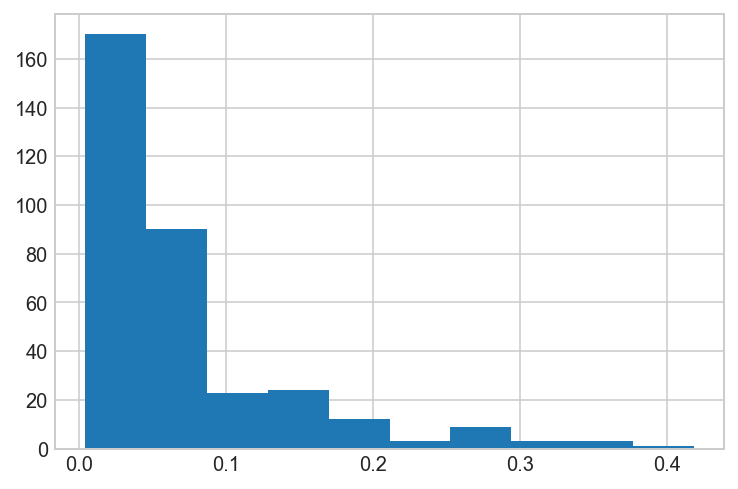

In [14]:
df['prppov'].hist()

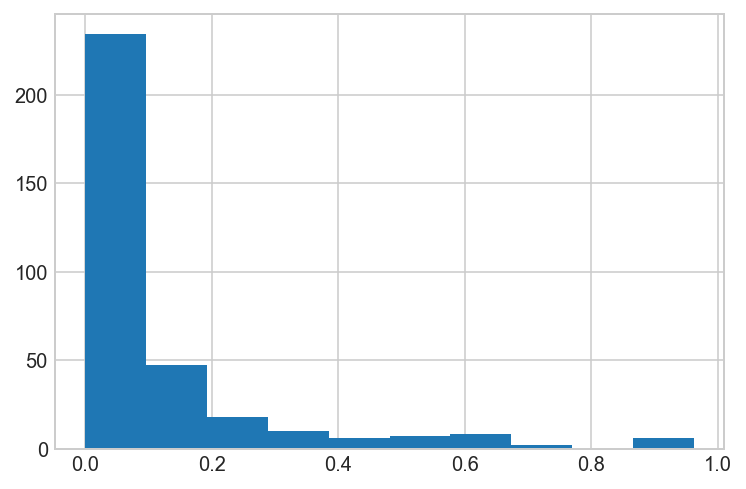

In [15]:
df['prpblck'].hist()

In [16]:
df['poor'] = (df['prppov'] > df['prppov'].mean())*1
df['black'] = (df['prpblck'] > df['prpblck'].mean())*1

C:\Users\Samson\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Samson\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
#poor areas have higher entree prices
df.groupby('poor').mean()[['psoda','pfries','pentree','meal']]

,psoda,pfries,pentree,meal
poor,,,,
0,1.044500,0.9275,1.316375,3.288375
1,1.042755,0.9050,1.406735,3.354490


In [18]:
#black areas have higher entree prices
df.groupby('black').mean()[['psoda','pfries','pentree','meal']]

,psoda,pfries,pentree,meal
black,,,,
0,1.039920,0.920518,1.283984,3.244422
1,1.055747,0.922299,1.511609,3.489655


In [19]:
#New Jersey has higher prices for black areas while Pennsylvania has lower prices for black areas
#Regression has to take into account state to prevent discrimination effects from cancelling
df.groupby(['black','state']).mean()[['psoda','pfries','pentree','meal']]

psoda    pfries   pentree      meal
black state                                        
0     1      1.061780  0.945131  1.297592  3.304503
      2      0.970333  0.842167  1.240667  3.053167
1     1      1.065696  0.933797  1.551013  3.550506
      2      0.957500  0.808750  1.122500  2.888750

In [20]:
#New Jersey has higher proportion of black and meal prices
df.groupby(['state']).mean()[['prpblck','meal']]

,prpblck,meal
state,,
1,0.133827,3.376481
2,0.041535,3.033824


In [21]:
df.groupby(['chain','black']).mean()[['meal']]

meal
chain black          
1     0      2.913246
      1      2.920400
2     0      4.324545
      1      4.419286
3     0      3.220690
      1      3.226316
4     0      3.004571
      1      3.036667

Text(0.5,0,u'black proportion')

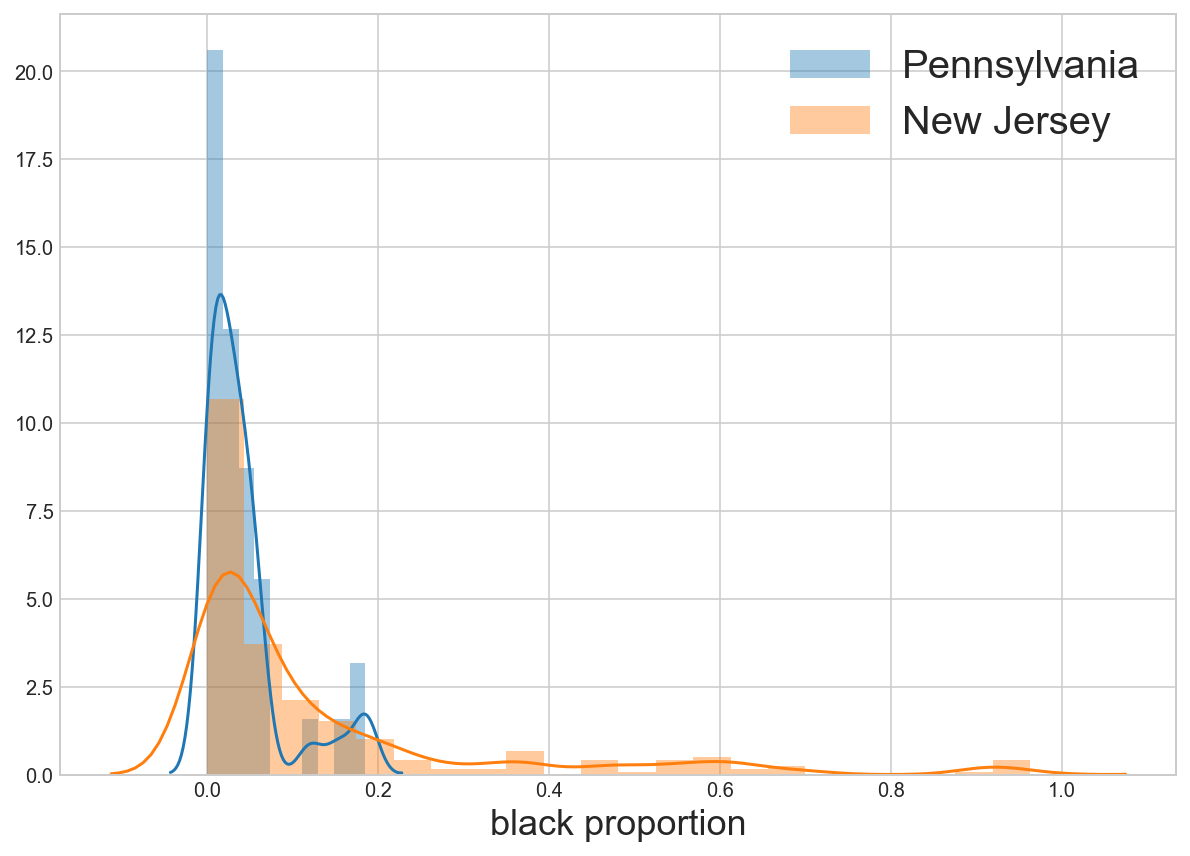

In [22]:
#set figure size for plot
plt.figure(figsize=(10,7))
#plot distribution for each variable
sns.distplot(df[df['state']==2]['prpblck'], label='Pennsylvania')
sns.distplot(df[df['state']==1]['prpblck'], label='New Jersey')
#include legend
plt.legend(prop={'size': 20})
plt.xlabel('black proportion', fontsize=18)

Text(0.5,0,u'Meal Price')

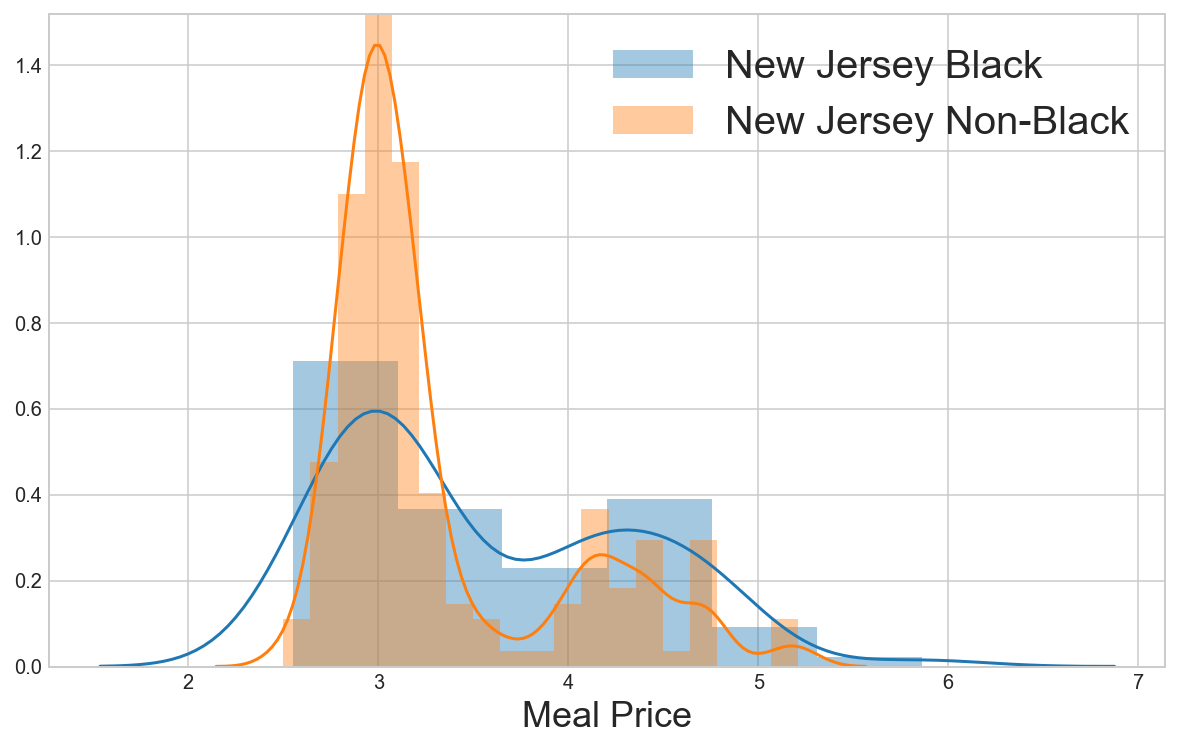

In [23]:
df[(df['black']==1) & (df['state']==1)]['meal']
#set figure size for plot
plt.figure(figsize=(10,6))
#plot distribution for each variable
sns.distplot(df[(df['black']==1) & (df['state']==1)]['meal'], label='New Jersey Black')
sns.distplot(df[(df['black']==0) & (df['state']==1)]['meal'], label='New Jersey Non-Black')
#include legend
plt.legend()
plt.legend(prop={'size': 20})
plt.xlabel('Meal Price', fontsize=18)

Text(0.5,0,u'Meal Price')

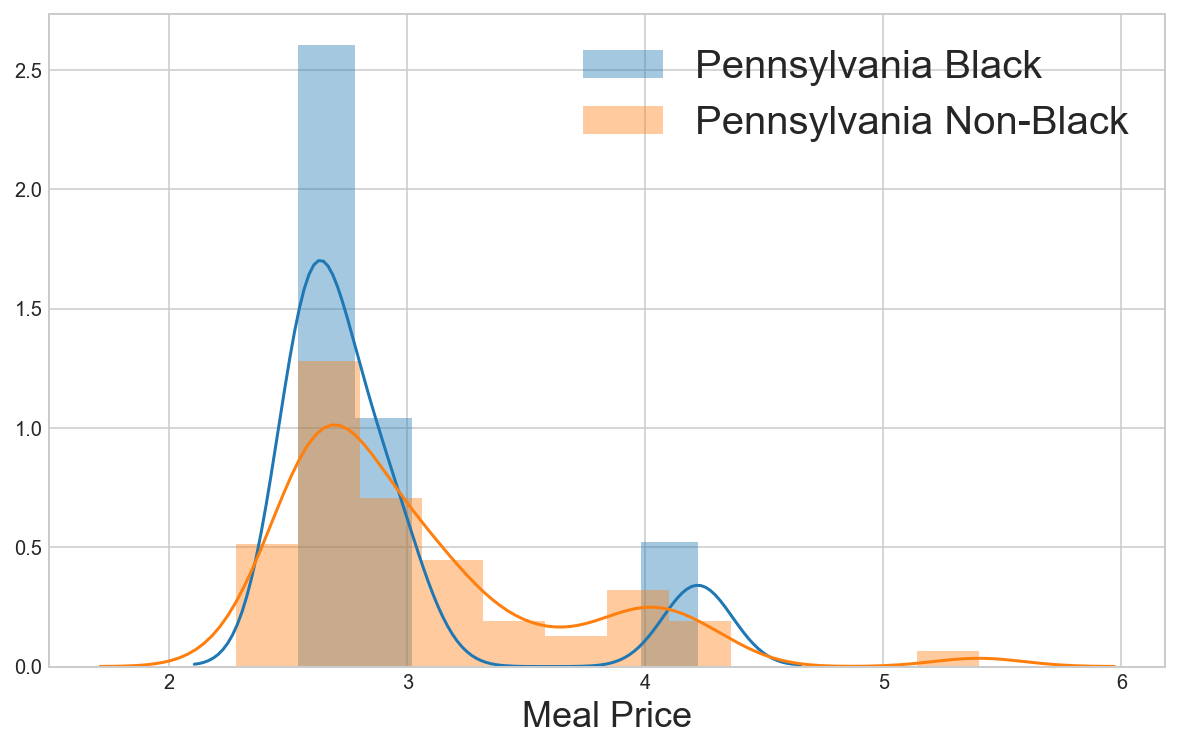

In [24]:
df[(df['black']==1) & (df['state']==1)]['meal']
#set figure size for plot
plt.figure(figsize=(10,6))
#plot distribution for each variable
sns.distplot(df[(df['black']==1) & (df['state']==2)]['meal'], label='Pennsylvania Black')
sns.distplot(df[(df['black']==0) & (df['state']==2)]['meal'], label='Pennsylvania Non-Black')
#include legend
plt.legend()
plt.legend(prop={'size': 20})
plt.xlabel('Meal Price', fontsize=18)

In [25]:
#breaking up into states
NJ = df[df['NJ']==1]
PA = df[df['NJ']==0]

In [26]:
#breaking blacks and non-blacks in New Jersey
NJ_B = NJ[NJ['black']==1]['meal']
NJ_NB = NJ[NJ['black']==0]['meal']

In [27]:
#ttest
print stats.ttest_ind(NJ_B, NJ_NB) 
print NJ_NB.mean(), NJ_B.mean()

Ttest_indResult(statistic=2.800355875918839, pvalue=0.005476150087934533)
3.3045026178 3.55050632911


In [28]:
#breaking blacks and non-blacks in Pennsylvania
PA_B = PA[PA['black']==1]['meal']
PA_NB = PA[PA['black']==0]['meal']

In [29]:
#ttest
print stats.ttest_ind(PA_B, PA_NB) 
print PA_NB.mean(), PA_B.mean()

Ttest_indResult(statistic=-0.7251558232905363, pvalue=0.4709197466363937)
3.05316666667 2.88875


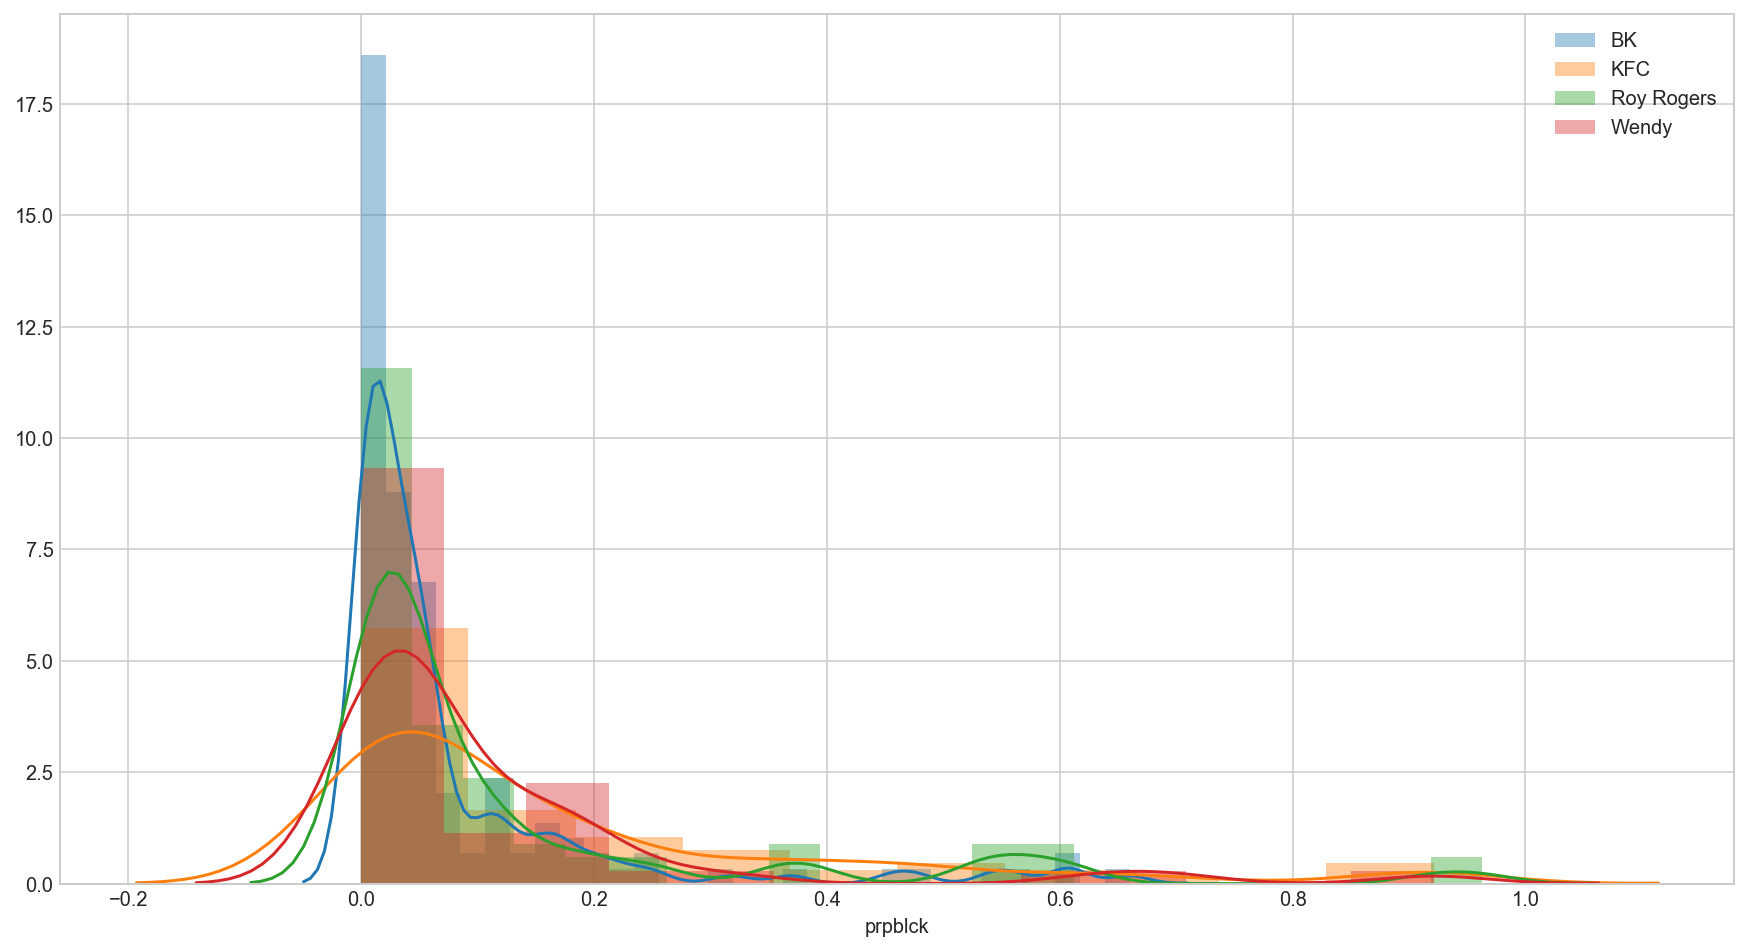

In [30]:
#set figure size for plot
plt.figure(figsize=(15,8))
#plot distribution for each variable
sns.distplot(df[df['chain']==1]['prpblck'], label='BK')
sns.distplot(df[df['chain']==2]['prpblck'], label='KFC')
sns.distplot(df[df['chain']==3]['prpblck'], label='Roy Rogers')
sns.distplot(df[df['chain']==4]['prpblck'], label='Wendy')
#include legend
plt.legend()

In [118]:
from sklearn.model_selection import train_test_split
X = df[['black','NJ','BK','KFC','RR']]
y = df['meal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
import statsmodels.api as sm
import numpy as np
#get training values
X = X_train.values
# Manually add the intercept column:
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = y_train.values
#model fitting
model = sm.OLS(y, X)
model = model.fit()
model.summary(xname = X_train.columns.values.tolist() + ['connst'])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     139.6
Date:                Fri, 22 Jun 2018   Prob (F-statistic):           5.50e-72
Time:                        14:01:51   Log-Likelihood:                -103.49
No. Observations:                 270   AIC:                             219.0
Df Residuals:                     264   BIC:                             240.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
black          0.0275      0.054      0.509      0.611      -0.079       0.134
NJ             0.2181      0.056      3.890      0.000       0.108       0.329
BK            -0.1709      0.070     -2.427      0.016      -0.310      -0.032
KFC            1.2615      0.078     16.170      0.000       1.108       1.415
RR             0.1589      0.077      2.068      0.040       0.008       0.310
connst         2.9020      0.073     39.863      0.000       2.759       3.045
==============================================================================
Omnibus:                       95.104   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              318.465
Skew:                           1.509   Prob(JB):                     7.02e-70
Kurtosis:                       7.381   Cond. No.                         8.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
from sklearn.model_selection import train_test_split
X = df[['crmrte','NJ','BK','KFC','RR']]
y = df['prpblck']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
import statsmodels.api as sm
import numpy as np
#get training values
X = X_train.values
# Manually add the intercept column:
X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = y_train.values
#model fitting
model = sm.OLS(y, X)
model = model.fit()
model.summary(xname = X_train.columns.values.tolist() + ['connst'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     34.38
Date:                Fri, 22 Jun 2018   Prob (F-statistic):           5.21e-27
Time:                        10:43:33   Log-Likelihood:                 143.52
No. Observations:                 270   AIC:                            -275.0
Df Residuals:                     264   BIC:                            -253.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crmrte         1.9925      0.173     11.499      0.000       1.651       2.334
NJ             0.0356      0.023      1.571      0.117      -0.009       0.080
BK            -0.0218      0.028     -0.773      0.440      -0.077       0.034
KFC            0.0465      0.031      1.494      0.136      -0.015       0.108
RR             0.0142      0.031      0.463      0.644      -0.046       0.075
connst        -0.0297      0.029     -1.009      0.314      -0.088       0.028
==============================================================================
Omnibus:                      145.658   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              745.406
Skew:                           2.247   Prob(JB):                    1.37e-162
Kurtosis:                       9.787   Cond. No.                         27.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
df.groupby('county').mean()

,psoda,pfries,pentree,wagest,nmgrs,nregs,hrsopen,emp,compown,chain,...,nstores,income,NJ,BK,KFC,RR,ID,meal,poor,black
county,,,,,,,,,,,,,,,,,,,,,
1,1.113636,0.939091,1.632727,4.696364,3.090909,3.636364,13.500000,10.181818,0.181818,2.000000,...,5.636364,34806.272727,1.0,0.363636,0.363636,0.181818,257.454545,3.685455,0.545455,0.545455
2,1.106071,1.030000,1.253929,4.648214,3.296429,4.000000,15.464286,18.062500,0.392857,1.964286,...,2.678571,54075.785714,1.0,0.500000,0.107143,0.321429,99.285714,3.390000,0.035714,0.142857
3,1.020000,0.890000,0.900000,4.500000,3.000000,3.000000,15.000000,29.000000,0.000000,1.000000,...,2.000000,37477.000000,0.0,1.000000,0.000000,0.000000,410.000000,2.810000,0.000000,0.000000
4,0.968182,0.830909,1.435455,4.863636,3.545455,3.727273,15.045455,21.886364,0.454545,1.909091,...,2.454545,46526.454545,0.0,0.454545,0.272727,0.181818,374.727273,3.234545,0.000000,0.000000
5,1.007059,0.871765,1.216471,4.593529,3.058824,3.352941,13.676471,15.970588,0.411765,2.176471,...,2.941176,49798.235294,1.0,0.411765,0.176471,0.235294,218.294118,3.095294,0.176471,0.352941
6,0.995200,0.856000,1.396800,4.553600,3.080000,3.680000,13.540000,12.220000,0.600000,2.120000,...,4.040000,43535.160000,1.0,0.320000,0.360000,0.200000,205.720000,3.248000,0.280000,0.280000
7,1.072500,0.987500,1.010000,4.685000,3.250000,3.000000,14.250000,12.125000,0.250000,2.250000,...,3.000000,46662.000000,1.0,0.500000,0.000000,0.250000,170.250000,3.070000,0.250000,0.250000
8,0.960000,0.760000,1.660000,4.375000,3.500000,3.500000,13.250000,13.750000,0.500000,1.500000,...,3.000000,46988.000000,0.0,0.500000,0.500000,0.000000,404.500000,3.380000,0.000000,0.000000
9,1.002857,0.860000,1.291429,4.285714,3.285714,3.428571,13.500000,12.214286,0.142857,2.000000,...,5.285714,35226.142857,1.0,0.428571,0.285714,0.142857,260.857143,3.154286,1.000000,0.428571


In [ ]:
sns.cmap

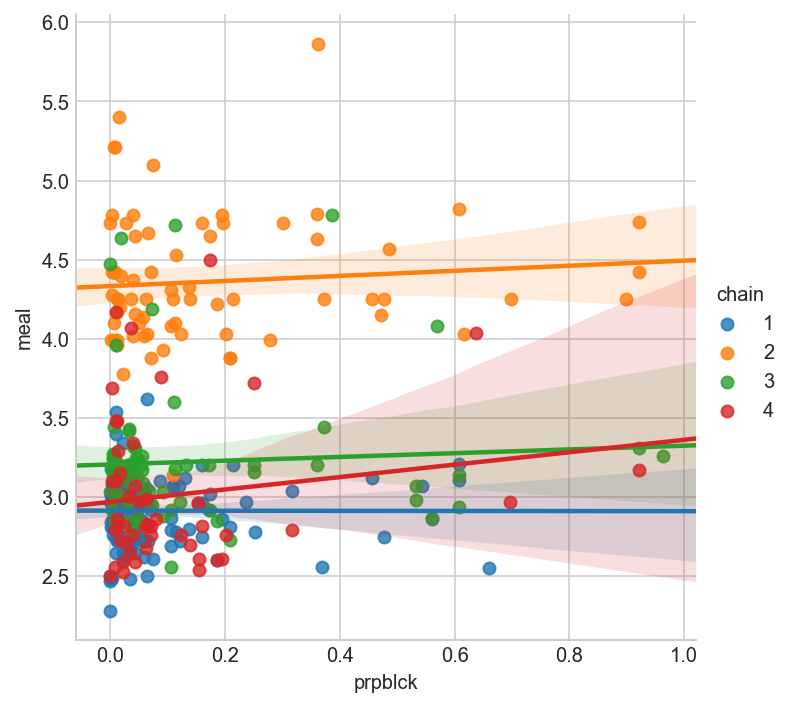

In [87]:
plt.figure(figsize=(10,6))
sns.lmplot('prpblck', 'meal', df, hue='chain' )

Text(0.5,1,u'BK')

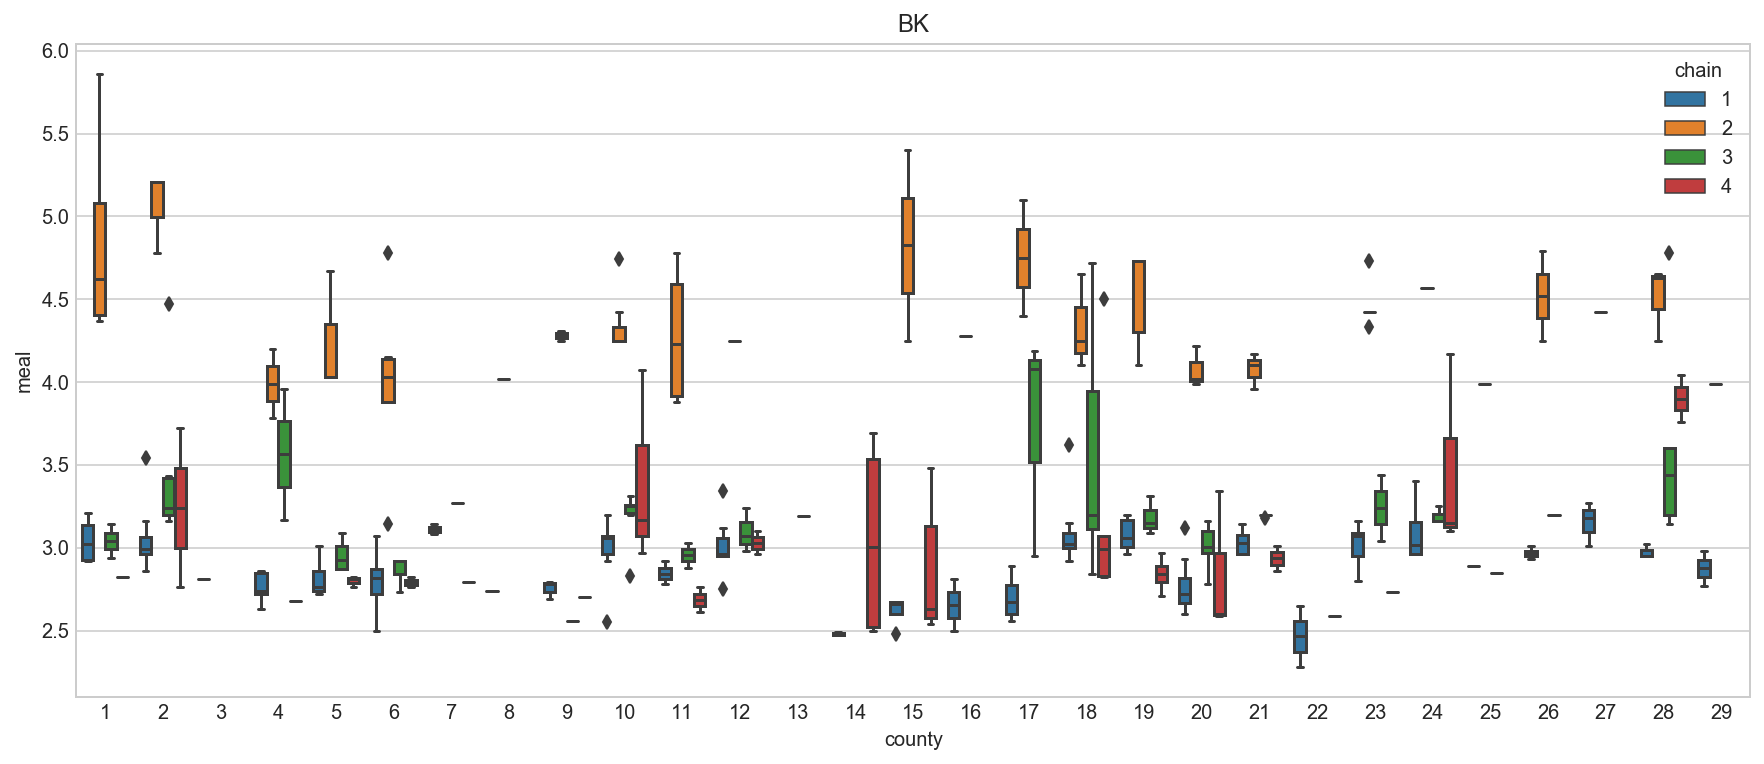

In [66]:
plt.figure(figsize=(15,6))
sns.boxplot(df['county'], df['meal'], hue=df['chain'])

plt.title('BK')

Text(0.5,1,u'KFC')

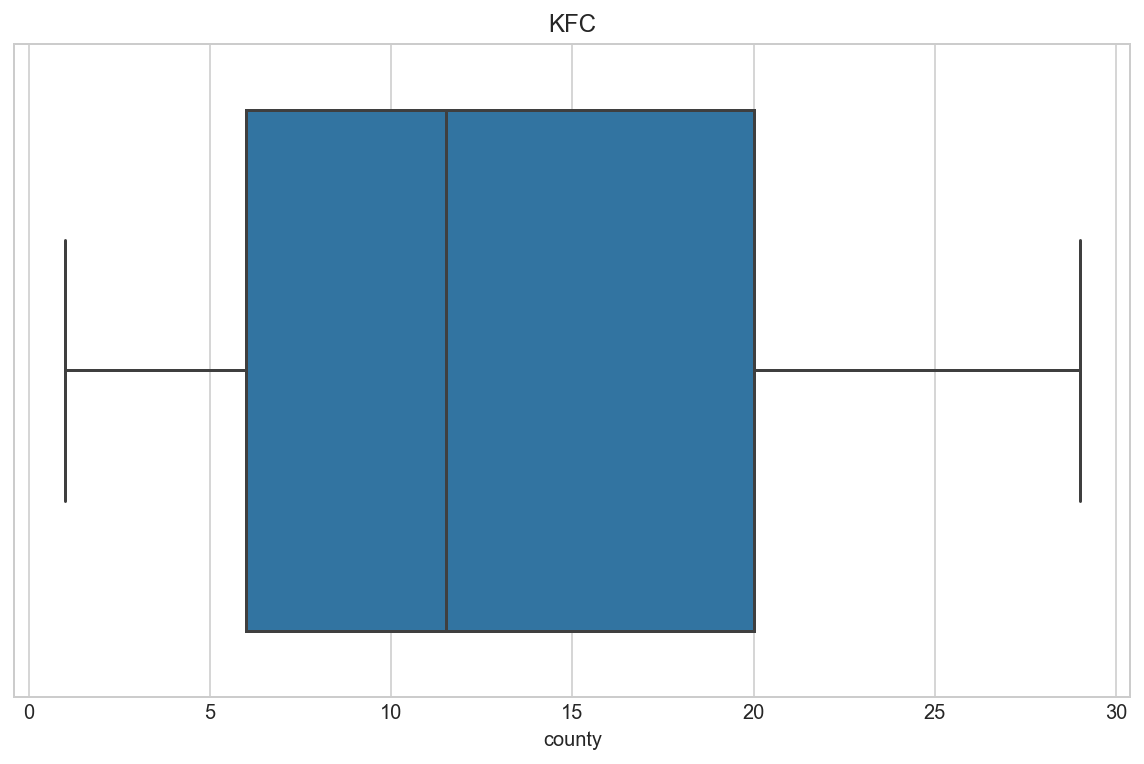

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(df[df['chain']==2]['county'], hue=df['meal'])
plt.title('KFC')

In [102]:
df[df['chain']==3][['county','meal']]

,county,meal
0,18,3.20
3,10,3.20
7,24,3.25
9,10,3.31
19,10,3.24
26,10,3.26
30,21,3.20
32,21,3.18
35,26,3.20
37,28,3.14


ValueError: Dimensions of labels and X must be compatible

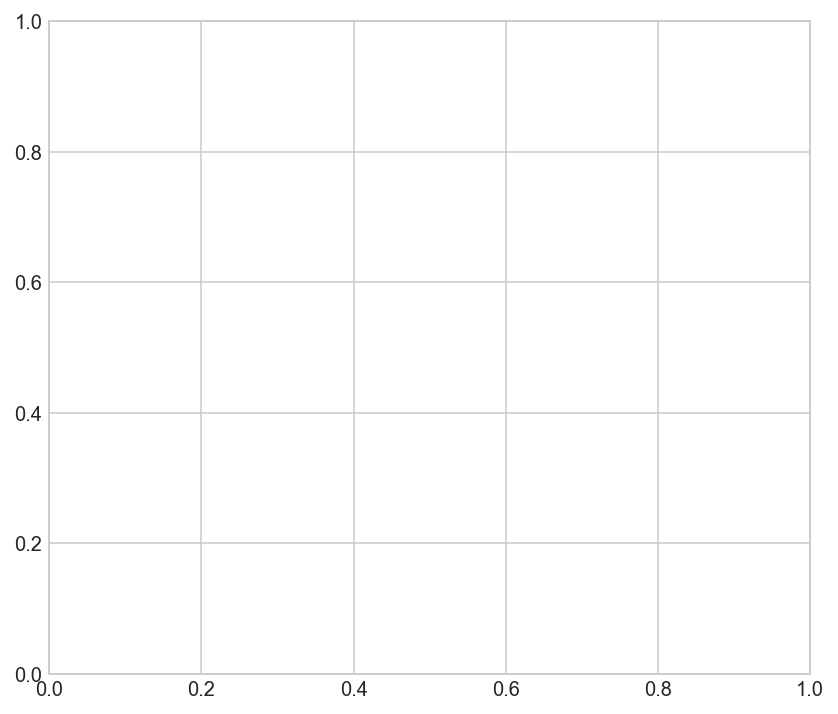

In [109]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)

plt.boxplot(x = df[df['chain']==3]['meal'],labels = df[df['chain']==3]['county'] ) # More on color options later
# plt.subplot(1,2,2)
# plt.boxplot(df[df['chain']==4][['county','meal']])
plt.show()
# fg, ax = plt.subplots(1,4)
# plt.figure(figsize=(1,6))
# sns.boxplot(df[df['chain']==3]['county'], df['meal'])
# plt.title('RR')
# plt.ylim(1,6)

(1, 6)

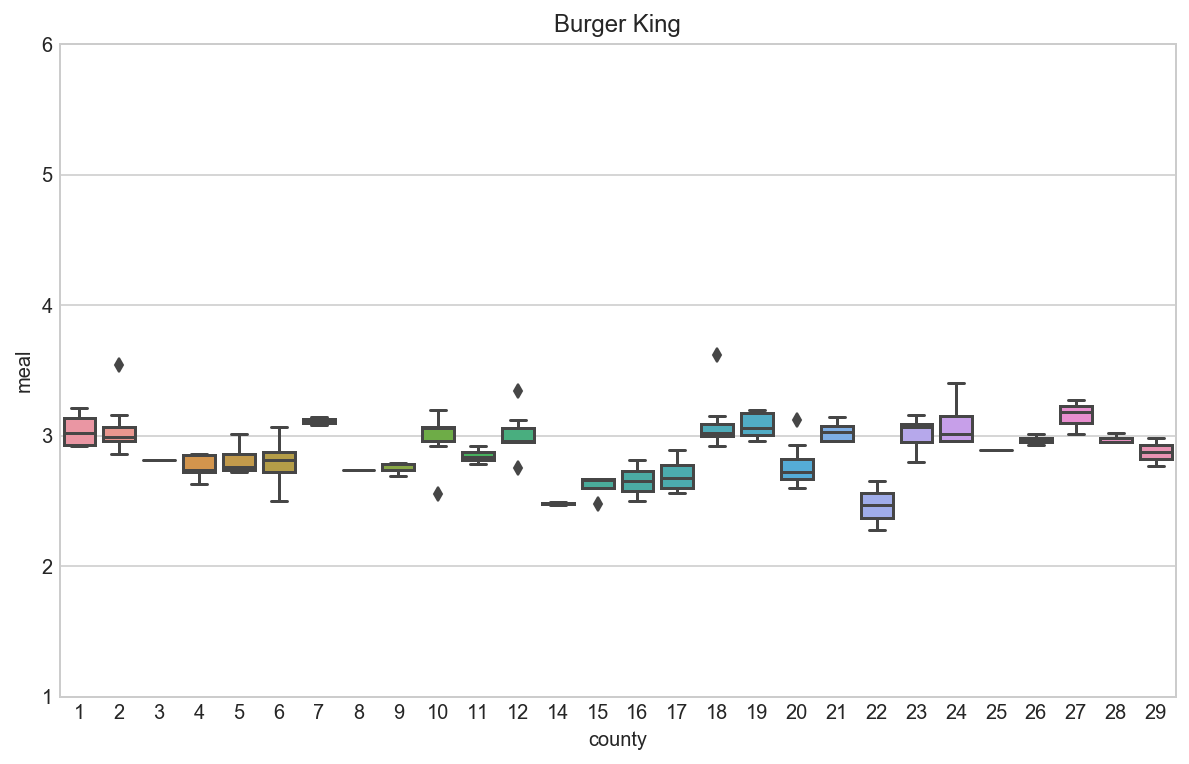

In [113]:
plt.figure(figsize=(10,6))
sns.boxplot(df[df['chain']==1]['county'], df['meal'])
plt.title('Burger King')
plt.ylim(1,6)

(1, 6)

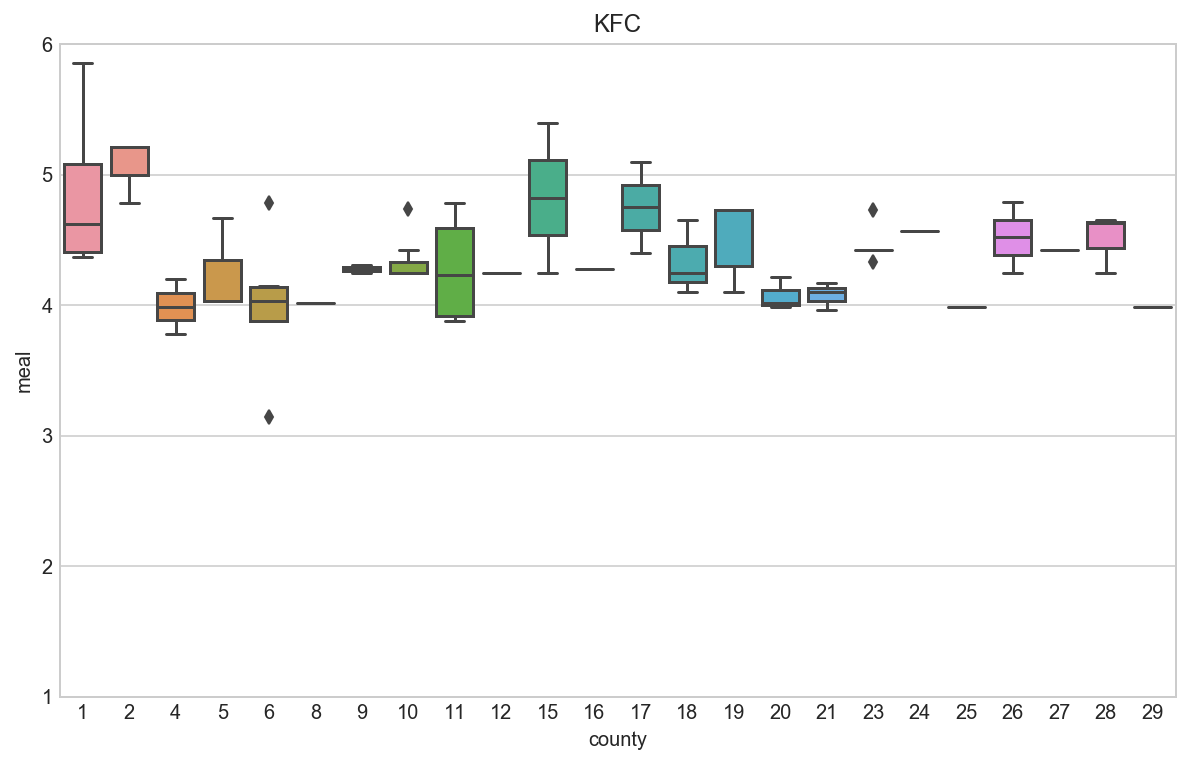

In [114]:
plt.figure(figsize=(10,6))
sns.boxplot(df[df['chain']==2]['county'], df['meal'])
plt.title('KFC')
plt.ylim(1,6)

(1, 6)

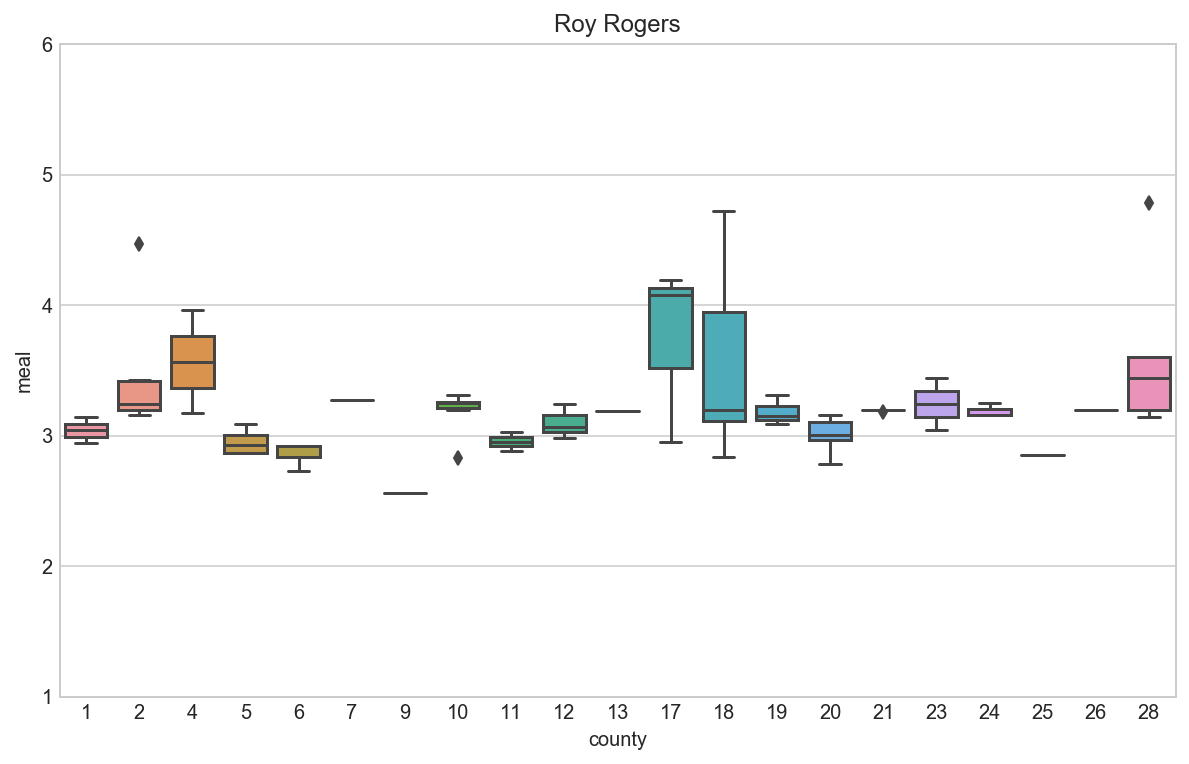

In [112]:
plt.figure(figsize=(10,6))
sns.boxplot(df[df['chain']==3]['county'], df['meal'])
plt.title('Roy Rogers')
plt.ylim(1,6)

(1, 6)

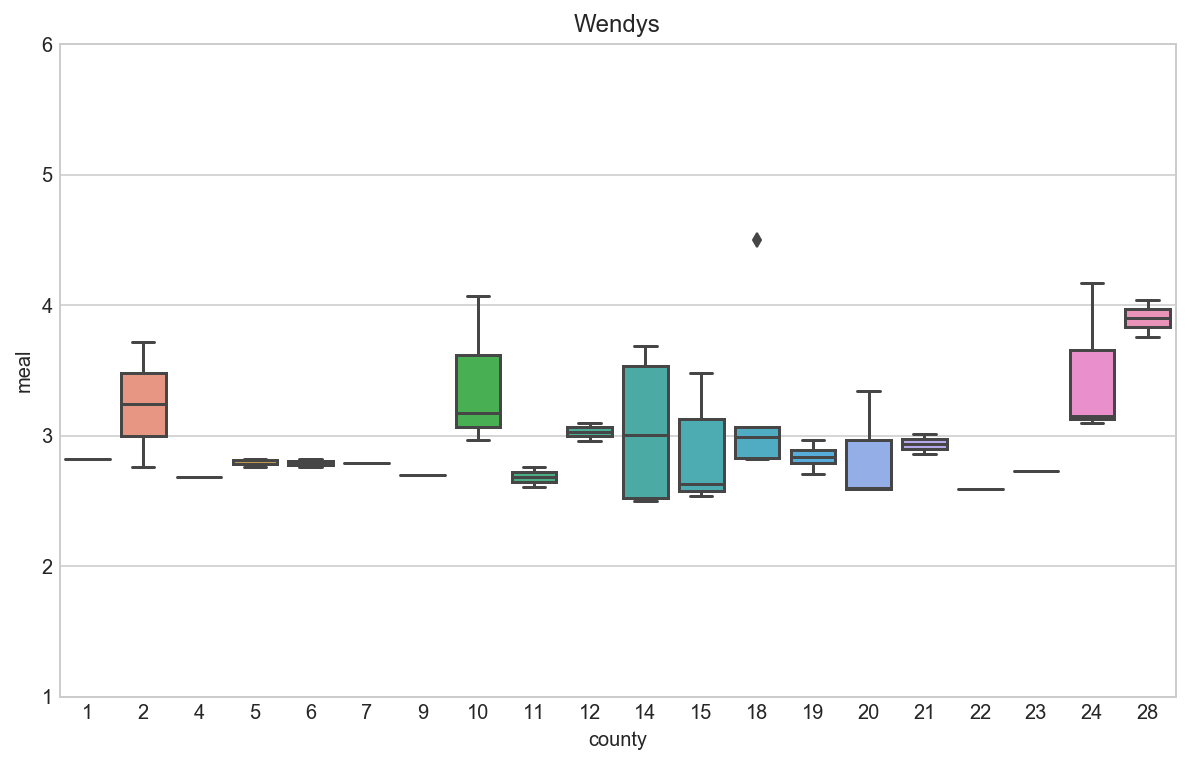

In [111]:
plt.figure(figsize=(10,6))
sns.boxplot(df[df['chain']==4]['county'], df['meal'])
plt.title('Wendys')
plt.ylim(1,6)

In [74]:
maxp = df.groupby(['county','chain']).max()['meal'].reset_index()
maxp.columns = ['county','chain','maxmeal']

In [76]:
minp = df.groupby(['county','chain']).min()['meal'].reset_index()
minp.columns = ['county','chain','minmeal']

In [78]:
df3 = maxp[['county','chain','maxmeal']]

In [79]:
df3['minmeal'] = minp['minmeal'] 

In [81]:
df3['diff'] = df3['maxmeal'] - df3['minmeal']

In [84]:
df3.sort_values('diff', ascending=False)

,county,chain,maxmeal,minmeal,diff
55,18,3,4.72,2.84,1.88
56,18,4,4.50,2.82,1.68
89,28,3,4.78,3.14,1.64
18,6,2,4.78,3.14,1.64
1,1,2,5.86,4.37,1.49
6,2,3,4.47,3.16,1.31
52,17,3,4.19,2.95,1.24
44,14,4,3.69,2.50,1.19
46,15,2,5.40,4.25,1.15
33,10,4,4.07,2.97,1.10


In [121]:
df.groupby('county').mean() 

,psoda,pfries,pentree,wagest,nmgrs,nregs,hrsopen,emp,compown,chain,...,nstores,income,NJ,BK,KFC,RR,ID,meal,poor,black
county,,,,,,,,,,,,,,,,,,,,,
1,1.113636,0.939091,1.632727,4.696364,3.090909,3.636364,13.500000,10.181818,0.181818,2.000000,...,5.636364,34806.272727,1.0,0.363636,0.363636,0.181818,257.454545,3.685455,0.545455,0.545455
2,1.106071,1.030000,1.253929,4.648214,3.296429,4.000000,15.464286,18.062500,0.392857,1.964286,...,2.678571,54075.785714,1.0,0.500000,0.107143,0.321429,99.285714,3.390000,0.035714,0.142857
3,1.020000,0.890000,0.900000,4.500000,3.000000,3.000000,15.000000,29.000000,0.000000,1.000000,...,2.000000,37477.000000,0.0,1.000000,0.000000,0.000000,410.000000,2.810000,0.000000,0.000000
4,0.968182,0.830909,1.435455,4.863636,3.545455,3.727273,15.045455,21.886364,0.454545,1.909091,...,2.454545,46526.454545,0.0,0.454545,0.272727,0.181818,374.727273,3.234545,0.000000,0.000000
5,1.007059,0.871765,1.216471,4.593529,3.058824,3.352941,13.676471,15.970588,0.411765,2.176471,...,2.941176,49798.235294,1.0,0.411765,0.176471,0.235294,218.294118,3.095294,0.176471,0.352941
6,0.995200,0.856000,1.396800,4.553600,3.080000,3.680000,13.540000,12.220000,0.600000,2.120000,...,4.040000,43535.160000,1.0,0.320000,0.360000,0.200000,205.720000,3.248000,0.280000,0.280000
7,1.072500,0.987500,1.010000,4.685000,3.250000,3.000000,14.250000,12.125000,0.250000,2.250000,...,3.000000,46662.000000,1.0,0.500000,0.000000,0.250000,170.250000,3.070000,0.250000,0.250000
8,0.960000,0.760000,1.660000,4.375000,3.500000,3.500000,13.250000,13.750000,0.500000,1.500000,...,3.000000,46988.000000,0.0,0.500000,0.500000,0.000000,404.500000,3.380000,0.000000,0.000000
9,1.002857,0.860000,1.291429,4.285714,3.285714,3.428571,13.500000,12.214286,0.142857,2.000000,...,5.285714,35226.142857,1.0,0.428571,0.285714,0.142857,260.857143,3.154286,1.000000,0.428571
